In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Diabetes Stage prediction.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Diabetes Stage prediction.csv')
df

,Gender,Age,Hypertension,C-Peptide,BMI,HbA1c_level,Blood_glucose_level,Diabetes Type
0,Female,80,0,0.8,25.19,6.6,140,1
1,Female,54,0,7.6,27.32,6.6,80,2
2,Male,28,0,1.9,27.32,7.2,158,1
3,Female,36,0,2.0,23.45,9.0,155,1
4,Male,76,1,0.7,20.14,8.1,155,1
5,Female,20,0,8.2,27.32,6.6,85,2
6,Female,44,0,6.8,19.31,6.5,200,2
7,Female,79,0,1.5,23.86,5.7,85,1
8,Male,42,0,4.5,33.64,6.3,145,2
9,Female,32,1,0.9,27.32,7.9,100,1


In [31]:
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
C-Peptide              0
BMI                    0
HbA1c_level            0
Blood_glucose_level    0
Diabetes Type          0
dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14.0,48.571429,21.389121,15.00,33.0000,48.50,63.750,80.0
Hypertension,14.0,0.214286,0.425815,0.00,0.0000,0.00,0.000,1.0
C-Peptide,14.0,3.185714,2.761231,0.50,0.9500,1.95,5.175,8.2
BMI,14.0,28.473571,8.757609,19.31,24.1925,27.32,27.320,54.7
HbA1c_level,14.0,7.278571,1.212232,5.70,6.5250,6.70,8.050,9.6
Blood_glucose_level,14.0,129.857143,41.633672,80.00,88.7500,135.00,155.000,200.0
Diabetes Type,14.0,1.428571,0.513553,1.00,1.0000,1.00,2.000,2.0


In [33]:
df.dtypes

Gender                  object
Age                      int64
Hypertension             int64
C-Peptide              float64
BMI                    float64
HbA1c_level            float64
Blood_glucose_level      int64
Diabetes Type            int64
dtype: object

In [34]:
df['Gender'] = df['Gender'].replace({ 'Female': 0, 'Male': 1})
df['Gender'].value_counts()

Gender
0    9
1    5
Name: count, dtype: int64

In [35]:
df['Diabetes Type'].value_counts()

Diabetes Type
1    8
2    6
Name: count, dtype: int64

In [36]:
df.head(8)

,Gender,Age,Hypertension,C-Peptide,BMI,HbA1c_level,Blood_glucose_level,Diabetes Type
0,0,80,0,0.8,25.19,6.6,140,1
1,0,54,0,7.6,27.32,6.6,80,2
2,1,28,0,1.9,27.32,7.2,158,1
3,0,36,0,2.0,23.45,9.0,155,1
4,1,76,1,0.7,20.14,8.1,155,1
5,0,20,0,8.2,27.32,6.6,85,2
6,0,44,0,6.8,19.31,6.5,200,2
7,0,79,0,1.5,23.86,5.7,85,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Diabetes Type',axis=1)
y = df['Diabetes Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

import catboost
model= catboost.CatBoostClassifier(verbose=0,
                                   iterations=600,
                                   learning_rate=0.026,
                                   max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

0.75

In [ ]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 374.9 kB/s eta 0:00:00a 0:00:01


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


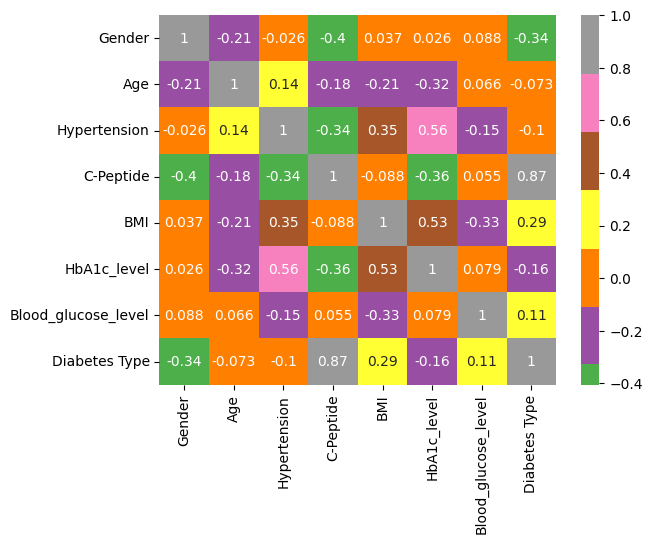

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='Set1', center=0)
plt.show()